In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())

import platform
from matplotlib import font_manager, rc
import seaborn as sns # 데이터셋을 가져오기 위해 import

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
# 그래프에서 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

import scipy as sp
import scipy.stats

C:\Users\USER\lg dx python


0.041656494140624965


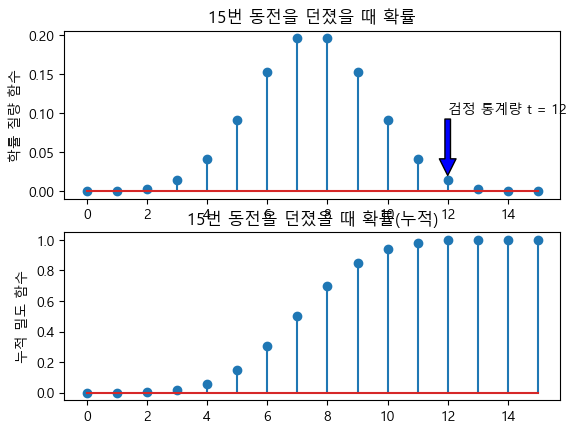

0.03515625


In [13]:
# 동전 15번 중 앞면 12번 문제

# 시행 횟수
N = 15
mu = 0.5 # 앞면이 나올 확률

# 이항 분포를 생성
rv = sp.stats.binom(N, mu)

# 확률 질량 함수 출력 - pmf 함수
# 확률 질량 함수 : 각각이 나올 수 있는 확률에 대한 함수
ran = np.arange(N + 1) # 범위 설정
plt.subplot(211)
plt.stem(ran, rv.pmf(ran))

# 그래프에 축 이름, 제목, 화살표 설정
plt.ylabel('학률 질량 함수')
plt.title('15번 동전을 던졌을 때 확률')
plt.annotate('검정 통계량 t = 12', xy = (12, 0.02), xytext = (12, 0.1),
            arrowprops = {'facecolor' : 'blue'})


# 앞면이 12번이 나올 확률
print(rv.pmf(12 - 1)) # 0.041


# 확률 질량 함수를 누적 밀도 함수로 그리기
# 누적 밀도 함수는 cdf 함수
plt.subplot(212) # 2번째 칸에 그리기
plt.stem(ran, rv.cdf(ran))

plt.ylabel('누적 밀도 함수')
plt.title('15번 동전을 던졌을 때 확률(누적)')

plt.show()

# 유의 확률 계산
# 양측 검정이므로 2를 곱함
p = 2 * (1 - rv.cdf(12 - 1))
print(p) # 0.035

In [22]:
# 성적 데이터가 있을 때 ‘평균이 몇 점이라 할 수 있는가?’ 하는 문제에 적용 가능
# 'tdata.csv’ 파일의 성적을 읽고 평균이 75점이라고 할 수 있는지 유의 수준 5% 로 검정

# 데이터 읽어오기
items = pd.read_csv('./data/tdata.csv', encoding = 'cp949')
#print(items['성적'].mean()) # 77.1

# 성적의 평균이 75점이라고 했을 때의 유의 확률 구하기
# 데이터와 기댓값을 ttest_1samp 함수에 입력
expect = 75
result = sp.stats.ttest_1samp(items['성적'], popmean = expect).pvalue
# 결과는 TtestResult 객체가 되는데 거기에서 pvalue 만 가져옴
print(result) # 0.5079

# 유의 수준을 5%로 설정
if result > 0.05:
    print('유의 확률이 유의 수준보다 크므로 귀무 가설 채택')
    print('평균은 ' + str(expect) + '점이라고 할 수 있음')
else:
    print('유의 확률이 유의 수준보다 작으므로 귀무 가설 기각')
    print('평균은 ' + str(expect) + '점이라고 할 수 없음')

0.5079049500571382
유의 확률이 유의 수준보다 크므로 귀무 가설 채택
평균은 75점이라고 할 수 있음


C:\Users\USER\AppData\Local\Temp\ipykernel_908\3871744044.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde = False, fit = sp.stats.norm, label = '첫번째 데이터 집단')
C:\Users\USER\AppData\Local\Temp\ipykernel_908\3871744044.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, 

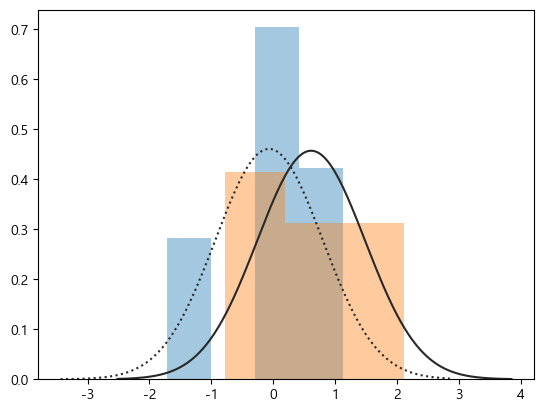

0.11402701298792454


In [30]:
# 제 2종 오류 발생 예시

# 첫번째 데이터 집단 생성
N1 = 10 # 데이터 갯수
mu1 = 0 # 평균
sigma1 = 1

# 두번째 데이터 집단 생성
# 첫번째 집단과 평균을 다르게 설정
N2 = 10 # 데이터 갯수
mu2 = 0.5 # 평균
sigma2 = 1

# 데이터 생성
np.random.seed(21) # 시드 고정
x1 = sp.stats.norm(mu1, sigma1).rvs(N1)
x2 = sp.stats.norm(mu2, sigma2).rvs(N2)

#print(x1)
#print(x2)

# 데이터의 분포 확인 - 두 집단의 분포가 서로 다름
ax = sns.distplot(x1, kde = False, fit = sp.stats.norm, label = '첫번째 데이터 집단')
ax = sns.distplot(x2, kde = False, fit = sp.stats.norm, label = '두번째 데이터 집단')
ax.lines[0].set_linestyle(':')

plt.show()

print(sp.stats.ttest_ind(x1, x2, equal_var = False).pvalue)
# 유의 확률이 0.1140
# 유의 수준을 알머로 지정하더라도 귀무 가설을 기각할 수 없음
# 즉, 두 집단은 서로 같은 집단이라는 결론
# 평균이 0, 0.5 로 서로 다른데도 '두 집단의 평균이 같다' 라는 유의 확률이 0.114
# 귀무 가설이 거짓인데 진실이라고 결과가 나옴
# 이런 경우를 2종 오류라고 하며 원인은 대부분 데이터의 부족

C:\Users\USER\AppData\Local\Temp\ipykernel_908\3848972909.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde = False, fit = sp.stats.norm, label = '첫번째 데이터 집단')
C:\Users\USER\AppData\Local\Temp\ipykernel_908\3848972909.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, 

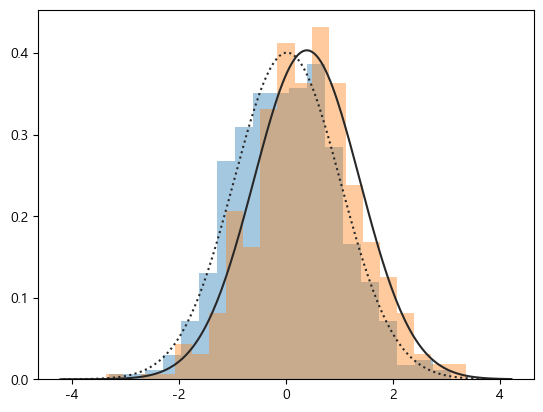

5.785382013254452e-09


In [31]:
# 2종 오류 제거 - 데이터의 갯수 늘리기

# 데이터의 갯수를 늘려서 데이터 집단 생성
# 첫번째 데이터 집단 생성
N1 = 500 # 데이터 갯수
mu1 = 0 # 평균
sigma1 = 1

# 두번째 데이터 집단 생성
# 첫번째 집단과 평균을 다르게 설정
N2 = 500 # 데이터 갯수
mu2 = 0.5 # 평균
sigma2 = 1

# 데이터 생성
np.random.seed(21) # 시드 고정
x1 = sp.stats.norm(mu1, sigma1).rvs(N1)
x2 = sp.stats.norm(mu2, sigma2).rvs(N2)

ax = sns.distplot(x1, kde = False, fit = sp.stats.norm, label = '첫번째 데이터 집단')
ax = sns.distplot(x2, kde = False, fit = sp.stats.norm, label = '두번째 데이터 집단')
ax.lines[0].set_linestyle(':')

plt.show()

print(sp.stats.ttest_ind(x1, x2, equal_var = False).pvalue)
# 유의 확률이 5.7853e-9
# 데이터의 갯수만 늘렸을 뿐인데 유의 확률이 매우 작아짐
# 즉, 같은 데이터 집단이라는 귀무 가설은 거짓


In [34]:
# 서로 다른 두 수면제를 복용한 경우 약의 효과가 다른지 여부를 판단
# 유의 수준은 5% 로 설정
# p-value 가 0.05 보다 크다면 귀무 가설 채택 - 2개의 평균은 같음
# 작다면 기각

# 데이터 생성
x1 = np.array([0.3, 0.8, 2.1, 1.5, 1.7, 3.0, -0.2, -0.3, -1.2, 1.7])
x2 = np.array([0.2, 0.1, -0.3, -0.6, 1.2, 0.7, -0.5, 1.4, -1.3, 0.0])

# 유의 확률 계산
result = sp.stats.ttest_ind(x1, x2, equal_var = True)
print(result) # 0.0965

# 귀무 가설 채택 여부 - 채택
if result.pvalue >= 0.05:
    print('2개의 효과는 거의 같음')
else:
    print('2개의 효과는 유의미한 차이를 보임')

Ttest_indResult(statistic=1.7532917761146258, pvalue=0.09656493419071667)
2개의 효과는 거의 같음


In [35]:
# 대응 표본 t 검정

# 서로 다른 집단이 아니라 동일 집단에게 
# 수면제1, 2 를 복용시켰을 때 수면 시간의 변화
# 데이터는 동일한 데이터 사용
x1 = np.array([0.3, 0.8, 2.1, 1.5, 1.7, 3.0, -0.2, -0.3, -1.2, 1.7])
x2 = np.array([0.2, 0.1, -0.3, -0.6, 1.2, 0.7, -0.5, 1.4, -1.3, 0.0])

# 대응 표본 t 검정 적용 - rel 함수
# 이전과 적용하는 함수가 달라짐
result = sp.stats.ttest_rel(x1, x2)
print(result) # 0.0660

TtestResult(statistic=2.0914993004816513, pvalue=0.06602259100156897, df=9)


In [44]:
# 윌콕슨의 부호 순위 검정

# 데이터 읽어오기
training_rel = pd.read_csv('./data/training_rel.csv')
#print(training_rel.head())

# 데이터 6개 복제
toy_df = training_rel[:6].copy()
#print(toy_df)

# 2개의 데이터의 차이 구하기
toy_df['차이'] = toy_df['후'] - toy_df['전']

# 차이의 절대값을 가지고 순위를 구함
toy_df['순위'] = sp.stats.rankdata(abs(toy_df['차이'])).astype(int)
print(toy_df)

# 차이가 음수인 경우와 양수인 경우의 순위 합을 구하기
r_minus = np.sum((toy_df['차이'] < 0) * toy_df['순위'])
r_plus = np.sum((toy_df['차이'] >= 0) * toy_df['순위'])
print(r_minus, r_plus) # 8 과 13
# 2개의 값 중 작은 쪽이 검정 통계량이 됨 - 8
# 이 값과 임계값(임의로 직접 설정한 값)을 비교해서 임계값 보다
# 작은 경우에 귀무 가설이 기각되는 단측 검정 방식
# 임계값 보다 크다면 채택

    전   후  차이  순위
0  59  41 -18   5
1  52  63  11   3
2  55  68  13   4
3  61  59  -2   1
4  59  84  25   6
5  45  37  -8   2
8 13


In [45]:
# 카이 제곱 검정

# 데이터 생성
food = [41, 30, 51, 71, 61]

# 카이 제곱 검정을 수행 - chisquare 함수 사용
print(sp.stats.chisquare(food)) # pvalue는 0.00039
# 유의 수준을 5% 로 설정하면 유의 수준이 유의 확률보다 크기 때문에
# 선호도의 차이가 있다고 해석

# 평균을 가지고 하는 검정과 분산을 가지고 하는 검정은 결과 해석을 반대로 함
# 여기에서는 유의 수준이 유의 확률보다 크다고 비교해서 귀무 가설을 채택

Power_divergenceResult(statistic=20.488188976377952, pvalue=0.00039991784008227264)


## 선형 대수

In [49]:
# 붓꽃 데이터 가져오기 - matrix 데이터

# sklearn 의 데이터는 data 속성에 feature 가 존재하고
# target 속성에 target 이 존재함
from sklearn.datasets import load_iris

# data 에는 길이, 폭과 같이 데이터에 대한 설명이 들어 있고 
# target 에는 그 데이터가 어떤 종에 속하는지에 대한 정보가 들어있음
iris = load_iris()
#print(iris.data)

# 벡터는 하나의 행 - Vector
# 가로, 세로 방향에 관계 없이 여러 스칼라 데이터가 모이면 벡터
# 여러 개의 데이터 묶음에서 하나의 데이터를 선택한 경우를 
# 특징 벡터(feature vector)라고 함
print(iris.data[0, :])

# 스칼라 데이터 - Scalar
# 벡터 안에서도 하나의 값
print(iris.data[0, 0])


[5.1 3.5 1.4 0.2]
5.1


In [50]:
# sklearn 에서는 벡터를 대입할 때 
# 열 갯수가 1개인 2차원 배열 객체를 대입해야 함
data1 = np.array([5.1, 3.5, 1.4, 0.2]) # 일반적인 경우의 벡터
# sklearn 에서 vector는 위와 같은 형식이 아님

# sklearn 에서의 벡터 형식
# 아래처럼 열 방향으로 데이터를 생성해서 대입
data1 = np.array([[5.1], [3.5], [1.4], [0.2]])
print(data1)

[[5.1]
 [3.5]
 [1.4]
 [0.2]]


(8, 8)


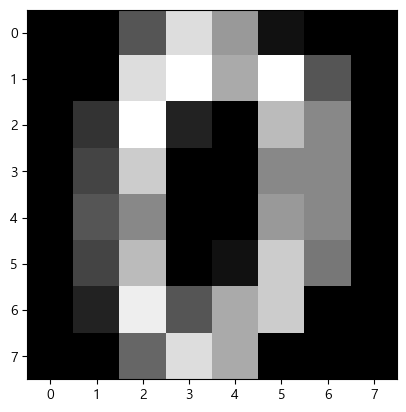

In [55]:
# 흑백 이미지 1개는 Matrix 데이터

# 숫자 그림 데이터 가져오기
from sklearn.datasets import load_digits

digits = load_digits()

# 데이터 확인
print(digits.images[0].shape) # 8x8
plt.imshow(digits.images[0], cmap = 'gray') # 흑백 숫자 그림
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_908\2275181991.py:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  rgb_image = misc.face()


(768, 1024, 3)


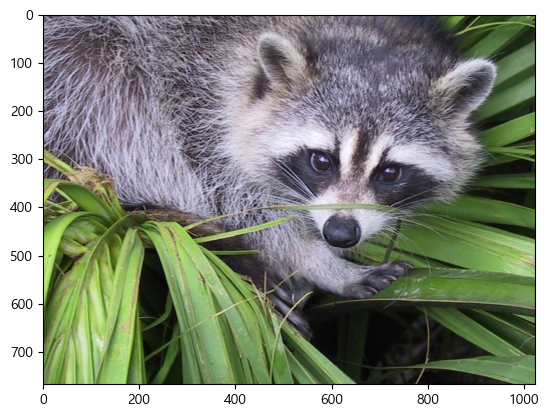

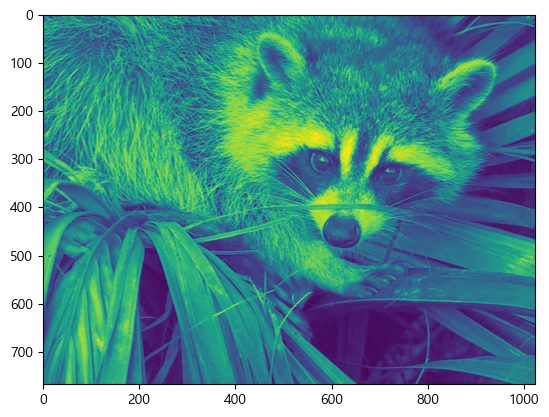

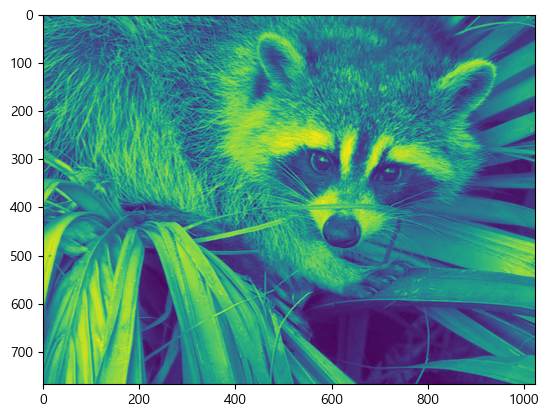

In [59]:
# 컬러 이미지 1개는 Tensor 데이터

# 컬러 이미지 가져오기
from scipy import misc

# 컬러 이미지 확인
rgb_image = misc.face()
print(rgb_image.shape) # (768, 1024, 3)

plt.imshow(rgb_image) # 컬러 그림
plt.show()

plt.imshow(rgb_image[:,:,0]) # RGB 중 B 이미지
plt.show()

plt.imshow(rgb_image[:,:,1]) # RGB 중 G 이미지
plt.show()

In [68]:
# 행렬 전치

arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr)

# 2차원 배열에서는 T 와 transpose() 의 결과가 같음
print(arr.T)
print(arr.transpose())

# 3차원 데이터 생성
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(arr)
print(arr.T)
# 3차원에서는 순서를 정해서 transpose를 처리할 수 있음
# 그래서 아래 둘의 결과가 서로 다름
print(arr.transpose())
print(arr.transpose(0, 1, 2))

[[1 2 3 4]
 [5 6 7 8]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[[1 5]
  [3 7]]

 [[2 6]
  [4 8]]]
[[[1 5]
  [3 7]]

 [[2 6]
  [4 8]]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [8]:
from scipy import sparse

# 대각 행렬 - 대각선으로만 1이 있는 행렬
# 기준선은 하나 위로 설정(k 값)
# eye 함수를 사용해서 대각 행렬을 생성
arr = np.eye(3, k = 1)
print(arr)

# 희소 행렬로 변환
sp = sparse.csr_matrix(arr)
print(sp)

# 결과 - 0이 아닌 데이터의 좌표만 저장
#  (0, 1)	1.0
#  (1, 2)	1.0

# 밀집 행렬로 변환 - 희소 행렬로 변환하기 전으로 돌아감
print(sp.toarray())

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
  (0, 1)	1.0
  (1, 2)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [11]:
# 스칼라, 벡터, 행렬 데이터의 산술 연산

# 동일한 차원인 벡터 사이의 연산
# 둘 사이의 shape 가 같아야 함
# shape 가 다르면 에러(연산 실패)
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([12, 23, 34, 45, 77])
print(data1 + data2)

# 다른 차원인 벡터 사이의 연산 - 브로드캐스트 연산
# shape 가 다르면 작은 쪽을 높은 쪽에 맞춰서 연산
print(data1 + 10) # 벡터와 스칼라 사이의 연산

# 벡터의 데이터 갯수와 행렬의 열의 갯수가 같아야 연산이 가능
matrix = np.array([[1, 2, 3, 4, 5], [10, 11, 12, 13, 14]])
print(data1.shape) # (5,)
print(matrix.shape) # (2, 5)
print(data1 + matrix) # 연산 성공


[13 25 37 49 82]
[11 12 13 14 15]
(5,)
(2, 5)
[[ 2  4  6  8 10]
 [11 13 15 17 19]]


In [14]:
# 벡터의 내적

# 일차원 배열은 전치를 하지 않아도 내적 계산이 가능함
x = np.array([1, 2, 3])
y = np.array([4, 4, 5])
print(np.dot(x, y))
print(x @ y)
# 벡터의 내적은 행과 열의 갯수가 크로스 방향으로 같아야 가능
print(x.T @ y) 
# 위의 세 경우는 모두 같은 결과

27
27
27


In [16]:
# 2차원 데이터 생성
x = np.array([[1], [2], [3]])
y = np.array([[4], [4], [5]])
# 2차원 배열은 내적을 구할 때 행과 열을 맞춰주어야 연산이 가능
#print(np.dot(x, y)) # 에러
print(np.dot(x.T, y)) # 연산 가능

[[27]]


In [18]:
# 내적의 활용 - 가중치 계산

score = np.array([92, 56, 83])
# 단순 평균
print(score.mean())

# 학점이 3, 1, 2 인 경우의 평균 - 가중합
w = np.array([3, 1, 2]) # 가중치(학점)
print(score @ w / sum(w))


77.0
83.0


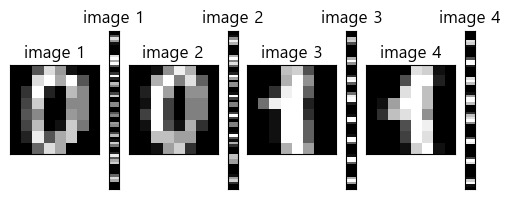

In [46]:
# 두 이미지의 유사도 계산

from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
#print(digits.data[0])

# 이미지 가져오기

# 숫자 0 이미지
data1 = digits.images[0]
data2 = digits.images[10]
# 숫자 1 이미지
data3 = digits.images[1]
data4 = digits.images[11]

# 이미지의 차원을 조절 
# 8x8 이나 64x1 이나 다룰 때는 동일함
v1 = data1.reshape(64, 1)
v2 = data2.reshape(64, 1)
v3 = data3.reshape(64, 1)
v4 = data4.reshape(64, 1)

# 이미지 출력 영역 생성
plt.figure(figsize = (6, 6))
# 1x8 영역을 생성하는데 높이는 모두 같고 너비는 9 와 1
gs = gridspec.GridSpec(1, 8, height_ratios = [1],
                       width_ratios = [9, 1, 9, 1, 9, 1, 9, 1])

for i in range(4):
    # 영역 설정
    plt.subplot(gs[2 * i])
    # 원본 이미지(data) 출력
    # eval 함수는 문자열을 객체로 변환
    plt.imshow(eval('data' + str(i + 1)), aspect = 1,
              interpolation = 'nearest', cmap = 'gray') 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {}'.format(i+1))
    
    plt.subplot(gs[2 * i + 1])
    # 차원을 변형한 이미지(v) 출력
    plt.imshow(eval('v' + str(i + 1)), aspect = 0.25,
              interpolation = 'nearest', cmap = 'gray')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {}'.format(i+1))

plt.show()

In [41]:
# 이미지의 유사도 계산
# 2차원인 원본 이미지로 계산하면 내적 계산의 결과가 여러 값으로 나타남
# 차원을 변경한 v 이미지를 사용해야 결과가 하나로 나옴

print(v1.T @ v2) # 자신을 제외하고 유사도(내적)가 가장 큼
print(v1.T @ v3)
print('---------')
print(v1.T @ v4)
print(v1.T @ v1) # 자기 자신이라서 유사도가 가장 크게 나타남

[[3064.]]
[[1866.]]
---------
[[1883.]]
[[3070.]]


In [48]:
# 행렬의 곱셈

# 8x8 행렬과 8x8 행렬의 곱 - 8x8 행렬
print(np.dot(data1, data2))

[[  0.  60. 448. 143.   1. 232. 224.   0.]
 [  0.  96. 908. 365.  65. 532. 362.   0.]
 [  0.  43. 577. 357. 115. 394. 202.   0.]
 [  0.  32. 460. 320. 120. 332. 156.   0.]
 [  0.  25. 423. 301. 129. 321. 129.   0.]
 [  0.  38. 512. 322. 114. 365. 167.   0.]
 [  0.  85. 678. 292.  28. 406. 294.   0.]
 [  0.  65. 464. 152.   0. 238. 238.   0.]]


In [49]:
# 단위 행렬의 곱셈

arr = np.array([[1, 2], [1, 2]])
i = np.eye(2) # 단위 행렬

print(np.dot(arr, i))

[[1. 2.]
 [1. 2.]]


In [50]:
arr = np.array([[1, 2], [1, 2]])
# 1차원 행렬은 전치를 하지 않아도 자동으로 처리해서 계산
v = np.array([1, 2])
print(arr @ v)

[5 5]


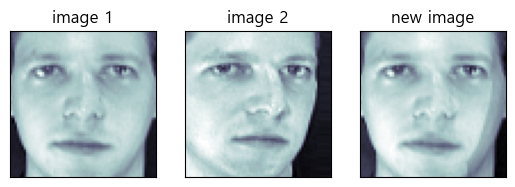

In [63]:
# 행렬과 벡터의 곱셈을 이용한 이미지 모핑(Morphing)

# 얼굴 이미지 데이터 가져오기
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
#print(faces.data[0])

# 영역 생성
f, ax = plt.subplots(1, 3)

# 이미지 가져와서 출력
ax[0].imshow(faces.images[0], cmap = plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('image 1')

ax[1].imshow(faces.images[1], cmap = plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('image 2')

# 이미지 합성 및 출력 - 가중치 사용
new_face = 0.7 * faces.images[0] + 0.3 * faces.images[1]

ax[2].imshow(new_face, cmap = plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('new image')

plt.show()

In [71]:
# 잔차 제곱합 구하기

x = np.array([1, 2, 3])
a = np.arange(1, 10).reshape(3, 3)

# 잔차 제곱합
print(x.T @ a @ x) # 228

228


In [72]:
# 대각 합
n = np.eye(4) 
print(np.trace(n)) # 4.0

4.0


In [75]:
# 행렬식
a = np.array([[1, 5], [2, 9]])
print(np.linalg.det(a)) # 1*9 - 2*5

-1.0


In [77]:
# 역행렬 구하기
a = np.array([[1, 2], [3, 5]])
inv = np.linalg.inv(a)
print(inv)
print(inv @ a) # 단위 행렬이 나와야 함

[[-5.  2.]
 [ 3. -1.]]
[[ 1.000e+00 -1.776e-15]
 [ 0.000e+00  1.000e+00]]
